<font size = "5"><b>ПРОЕКТНАЯ РАБОТА</b></font><br/>
<font size = "4"><b>Проведение анализа поведения клиентов по тарифам компании «Мегалайн»</b></font>

<a name = "0.0"></a><font size = "4"><b>Содержание</b></font><br/>
* [0, Описание проекта](#0.)
* [1. Изучение общей информации](#1.)
    - [1.1 Информация о пользователях](#1.1.)
    - [1.2 Информация о звонках](#1.2.)
    - [1.3 Информация о сообщениях](#1.3.)
    - [1.4 Информация об интернет-сессиях](#1.4.)
    - [1.5 Информация о тарифах](#1.5.)
* [2. Подготовка данных](#2.)
    - [2.1 Переименование столбцов](#2.1.)
    - [2.2 Изменение типа данных](#2.2.)
    - [2.3 Корректировка данных в столбцах duration и mb_used](#2.3.)
    - [2.4 Удаление столбца Unnamed: 0](#2.4.)
    - [2.5 Проведем категоризацию звонков, сообщей, интернет-трафика по месяцам](#2.5.)
* [3. Проведение анализа данных](#3.)
    - [3.1 Посмотрим и отфильтруем данные по выбросам звонков, сообщений и интернет-трафика](#3.1.)
    - [3.2 Построим гистограммы по тарифам длительности звонков, количеству сообщений, объему интернет-трафика и посчитаем среднее, дисперсию и стандартное отклонение](#3.2.)
* [4. Проверка гипотез](#4.)
    - [4.1 Средняя выручка пользователей тарифов «Ultra» и «Smart» различаются](#4.1.)
    - [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#4.2.)
* [5. Общий вывод](#5.)

<a name = "0."></a><font size = "4"><b>Описание проекта</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
<br/>
Компания `«Мегалайн»` — федерального оператора сотовой связи.<br/>
Клиентам предлагают два тарифных плана: `«Смарт»` и `«Ультра»`.<br/>
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br/>
<br/>
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Мы имеем данные 500 пользователей `«Мегалайна»`: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.<br/>
<i>Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.</i>

<b>Описание тарифов</b><br/>
`Тариф «Смарт»`<br/>
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br/>
<font size ="2"><b>Стоимость услуг сверх тарифного пакета:</b></font><br/>
* минута разговора: 3 рубля
* сообщение: 3 рубля<br/>
* 1 Гб интернет-трафика: 200 рублей<br/>


`Тариф «Ультра»`<br/>
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br/>
<font size ="2"><b>Стоимость услуг сверх тарифного пакета:</b></font><br/>
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Известно:**<br/>
`«Мегалайн»` всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.<br/>
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<b>Описание данных</b><br/>
<b><i>Таблица users (информация о пользователях):</i></b><br/>
`user_id` — уникальный идентификатор пользователя<br/>
`first_name` — имя пользователя<br/>
`last_name` — фамилия пользователя<br/>
`age` — возраст пользователя (годы)<br/>
`reg_date` — дата подключения тарифа (день, месяц, год)<br/>
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br/>
`city` — город проживания пользователя<br/>
`tariff` — название тарифного плана<br/>
<b><i>Таблица calls (информация о звонках):</i></b><br/>
`id` — уникальный номер звонка<br/>
`call_date` — дата звонка<br/>
`duration` — длительность звонка в минутах<br/>
`user_id` — идентификатор пользователя, сделавшего звонок<br/>
<b><i>Таблица messages (информация о сообщениях):</i></b><br/>
`id` — уникальный номер сообщения<br/>
`message_date` — дата сообщения<br/>
`user_id` — идентификатор пользователя, отправившего сообщение<br/>
<b><i>Таблица internet (информация об интернет-сессиях):</i></b><br/>
`id` — уникальный номер сессии<br/>
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)<br/>
`session_date` — дата интернет-сессии<br/>
`user_id` — идентификатор пользователя<br/>
<b><i>Таблица tariffs (информация о тарифах):</i></b><br/>
`tariff_name` — название тарифа<br/>
`rub_monthly_fee` — ежемесячная абонентская плата в рублях<br/>
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату<br/>
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату<br/>
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br/>
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br/>
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета<br/>
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<b>Этапы выполнения проекта:</b><br/>
1. Изучение общей информации
2. Подготовка данных
3. Проведение анализа данных
4. Проверка гипотез
5. Общий вывод

<b>Гипотезы:</b><br/>
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<a name = "1."></a><font size = "4"><b>1. Изучение общей информации</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1618]:
import matplotlib.pyplot as plt # библиотека для визуализации данных
import numpy as np # библиотека предоставляющая общие математические и числовые операции в виде функций
from scipy import stats as st # пакет статистических функций
import pandas as pd # библиотека для обработки и анализа данных
import seaborn as sns # библиотека шаблонов для статистической визуализации
import math as mt # пакет математических функций

In [1619]:
# импортируем данные
try:
    user = pd.read_csv('users.csv')
    call = pd.read_csv('calls.csv')
    mes = pd.read_csv('messages.csv')
    net = pd.read_csv('internet.csv')
    trf = pd.read_csv('tariffs.csv')
except:
    user = pd.read_csv('/datasets/users.csv')
    call = pd.read_csv('/datasets/calls.csv')
    mes = pd.read_csv('/datasets/messages.csv')
    net = pd.read_csv('/datasets/internet.csv')
    trf = pd.read_csv('/datasets/tariffs.csv')

<a name = "1.1."></a><b>1.1 Информация о пользователях</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1620]:
print('Количество дубликатов:', user.duplicated().sum())
print('Посмотрим сколько человек пользуется тем или иным тарифом:')
display(user.tariff.value_counts())
display(user)
display(user.describe())
display(user.info())

Количество дубликатов: 0
Посмотрим сколько человек пользуется тем или иным тарифом:


smart    351
ultra    149
Name: tariff, dtype: int64

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<a name = "1.2."></a><b>1.2 Информация о звонках</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1621]:
display(call)
display(call.describe())
display(call.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

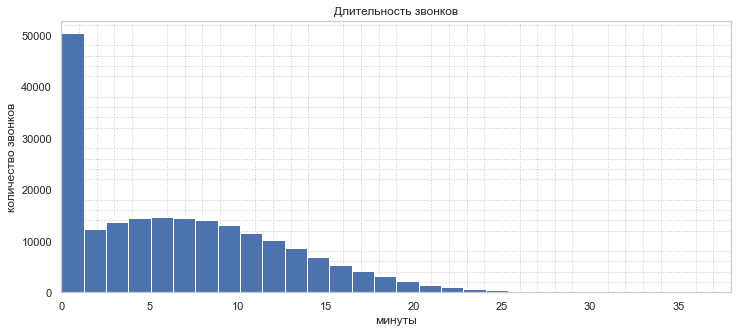

Количество звонков с нулевым значением: 39613
Количество звонков от 0 до минуты: 8314


In [1622]:
# построим гистограмму длительности звонков
plt.figure(figsize = (12, 5))
call['duration'].plot(kind = 'hist', bins = 30)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('количество звонков')
plt.xlabel('минуты')
plt.title('Длительность звонков')
plt.xlim(0, 38)
plt.show()
print('Количество звонков с нулевым значением:', call.query('duration == 0')['duration'].count())
print('Количество звонков от 0 до минуты:', call.query('0 < duration < 1')['duration'].count())

<a name = "1.3."></a><b>1.3 Информация о сообщениях</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1623]:
display(mes)
display(mes.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<a name = "1.4."></a><b>1.4 Информация об интернет-сессиях</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Количество абонентов, у которых объем потраченного за сессию интернет-трафика составляет 0 мб: 19598
Количество абонентов, у которых объем потраченного за сессию интернет-трафика до 1 мб: 101


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


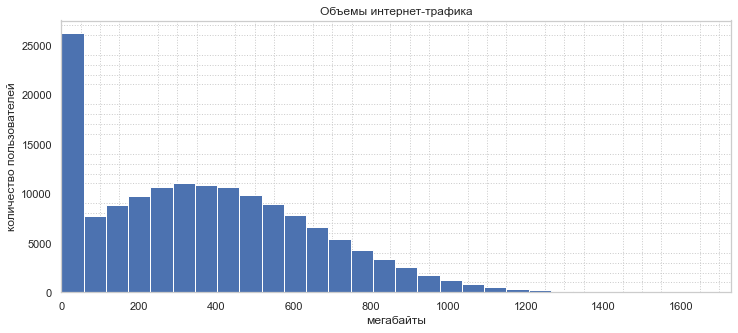

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

In [1624]:
print('Количество абонентов, у которых объем потраченного за сессию интернет-трафика составляет 0 мб:', net.query('mb_used == 0')['mb_used'].count())
print('Количество абонентов, у которых объем потраченного за сессию интернет-трафика до 1 мб:', net.query('0 < mb_used < 1')['mb_used'].count())
display(net)
display(net.describe())
# построим гистограмму длительности звонков
plt.figure(figsize = (12, 5))
net['mb_used'].plot(kind = 'hist', bins = 30)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('количество пользователей')
plt.xlabel('мегабайты')
plt.title('Объемы интернет-трафика')
plt.xlim(0, 1730)
plt.show()
display(net.info())

<a name = "1.5."></a><b>1.5 Информация о тарифах</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1625]:
display(trf)
display(trf.describe())
display(trf.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

**Вывод:**<br/>
    * по пользователям:
- в колонке `age` нулевых значений нет.
- в целом названия колонок меня устраивает, оставим без изменений.
- в колонке `churn_date` по условию, если значения нет, значит на момент выгрузки данных тариф действовал. Тип данных `object` необходимо изменить на `datatime64`.
- в колонке `reg_date` тоже изменим тип данных.
- имеем 500 строк, тарифом `smart` пользуется 351 чел., `ultra` - 149 чел., дубликатов в таблице нет.<br/>
<br/>
    * по звонкам:
- изменим тип данных столбца `call_date` на `datatime64`.
- имеем 202 607 строк.
- имеются данные в столбце длительности разговора, согласно правилам компании Мегалайн, где длительность разговора больше 0 и меньше минуты будет округляться до минут разговора.
- нулями обозначены пропущенные звонки, поэтому их удалять не будем
- округлим duration до целых чисел.<br/>
<br/>
    * по сообщениям:
- изменим тип данных столбца `message_date` на `datatime64`.
- изменим название столбца `message_date` на более короткое `mes_date`.
- имеем 123 036 строк.<br/>
<br/>
    * по интернет-сессиям:
- столбец `Unnamed: 0` нам неизвестен, удалим его.
- в столбце `mb_used` имеются нулевые значения, думаю, что пользователь не пользовался интернетом.
- изменим тип данных столбца `session_date` на `datatime64`.
- изменим название столбца `session_date` на более короткое `ses_date`.
- имеем 149 396 строк.
- имеются пользователи, у которых объем использованных мб равен нулю, будем считать, что пользователи не пользовались интернетом и удалять их не будем.
- объемы, которые меньше 1 мб, а их совсем немного, возьмем за 1 мб.
- округлим mb_used до целых чисел.<br/>
<br/>
    * по тарифам:
- будем считать, что вся оплата проходит в рублях.
- изменим название столбцов для удобства использоания `messages_included` на `mes_month`, `mb_per_month_included` на `mb_month`, `minutes_included` на `min_month`, `rub_monthly_fee` на `sub_fee`, `rub_per_gb` на `per_gb`, `rub_per_message` на `per_mes`, `rub_per_minute` на `per_min`, `tariff_name` на `tariff`.

<br/>
<br/>

<b>Посчитаем для каждого пользователя:</b><br/>
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

<a name = "2."></a><font size = "4"><b>2. Подготовка данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "2.1."></a><b>2.1 Переименование столбцов</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1626]:
# датафрейм сообщений
mes = mes.rename(columns = {'message_date' : 'mes_date'})

In [1627]:
# датафрейм интернет-сессий
net = net.rename(columns = {'session_date' : 'ses_date'})

In [1628]:
# датафрейм тарифов
trf =trf.rename(columns = {
    'messages_included' : 'mes_month', 'mb_per_month_included' : 'mb_month',\
    'minutes_included' : 'min_month', 'rub_monthly_fee' : 'sub_fee',\
    'rub_per_gb' : 'per_gb', 'rub_per_message' : 'per_mes',\
    'rub_per_minute' : 'per_min', 'tariff_name' : 'tariff'
})

<a name = "2.2."></a><b>2.2 Изменение типа данных</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1629]:
# датафрейм пользователи
user.churn_date = pd.to_datetime(user.churn_date, format = '%Y.%m.%d')
user.reg_date = pd.to_datetime(user.reg_date, format = '%Y.%m.%d')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [1630]:
# датафрейм звонки
call.call_date = pd.to_datetime(call.call_date, format = '%Y.%m.%d')
# округлим duration до целых чисел
call.duration = np.ceil(call.duration).astype('int64')
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [1631]:
# датафрейм сообщения
mes.mes_date = pd.to_datetime(mes.mes_date, format = '%Y.%m.%d')
mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        123036 non-null  object        
 1   mes_date  123036 non-null  datetime64[ns]
 2   user_id   123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [1632]:
# датафрейм интернет-сессий
net.ses_date = pd.to_datetime(net.ses_date, format = '%Y.%m.%d')
# округлим mb_used до целых чисел
net.mb_used = np.ceil(net.mb_used).astype('int64')
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  149396 non-null  int64         
 1   id          149396 non-null  object        
 2   mb_used     149396 non-null  int64         
 3   ses_date    149396 non-null  datetime64[ns]
 4   user_id     149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


<a name = "2.3."></a><b>2.3 Корректировка данных в столбцах `duration` и `mb_used`</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1633]:
filter_old = call.query('0 < duration < 1')['duration'].count()
print('Заменим отфильтрованные звонки согласно правилам `Мегалайн`')
print('Количество значений от 0 до 1:', filter_old)

row = (call['duration'] > 0) & (call['duration'] < 1)
call.loc[row, 'duration'] = 1

filter_new = call.query('0 < duration < 1')['duration'].count()
print('Количество значений после корректировки:', filter_new)

Заменим отфильтрованные звонки согласно правилам `Мегалайн`
Количество значений от 0 до 1: 0
Количество значений после корректировки: 0


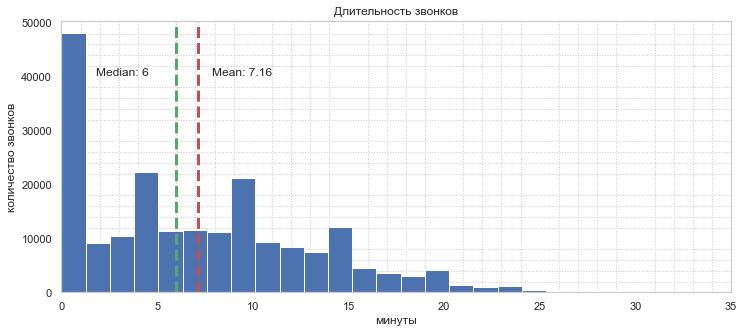

In [1634]:
# построим гистограмму длительности звонков
plt.figure(figsize = (12, 5))
call['duration'].plot(kind = 'hist', bins = 30)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('количество звонков')
plt.xlabel('минуты')
plt.title('Длительность звонков')
plt.xlim(0, 35)
plt.axvline(call.duration.describe()['mean'], color = 'r', ls = 'dashed', lw = 3)
plt.axvline(call.duration.describe()['50%'], color = 'g', ls = 'dashed', lw = 3)
min_ylim, max_ylim = plt.ylim()
plt.text(call.duration.mean() * 1.1, max_ylim * 0.8, 'Mean: {:.2f}'.format(call.duration.mean()))
plt.text(call.duration.median() * 0.3, max_ylim * 0.8, 'Median: {:.0f}'.format(call.duration.median()))
plt.show()

In [1635]:
filter_old = net.query('0 < mb_used < 1')['mb_used'].count()
print('Округлим отфильтрованные объемы до 1 мб:')
print('Количество абонентов, у которых объем трафика менее 1 минуты:', filter_old)

net.loc[((net.mb_used > 0) & (net.mb_used < 1)), 'mb_used'] = 1

filter_new = net.query('0 < mb_used < 1')['mb_used'].count()
print('Количество абонентов, у которых объем трафика менее 1 минуты после корректировки:', filter_new)

# округлим до целых чисел
net.mb_used = net.mb_used.astype('int64')

Округлим отфильтрованные объемы до 1 мб:
Количество абонентов, у которых объем трафика менее 1 минуты: 0
Количество абонентов, у которых объем трафика менее 1 минуты после корректировки: 0


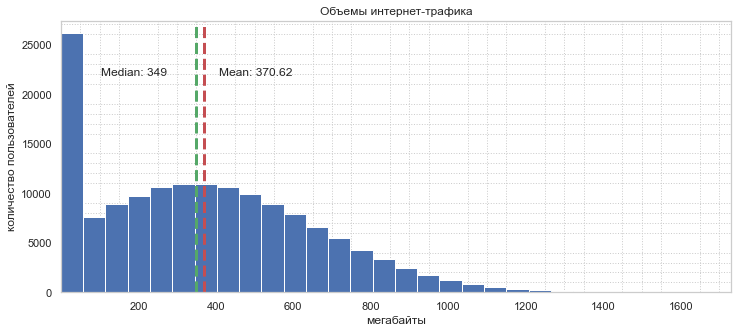

In [1636]:
# построим гистограмму длительности звонков
plt.figure(figsize = (12, 5))
net['mb_used'].plot(kind = 'hist', bins = 30)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('количество пользователей')
plt.xlabel('мегабайты')
plt.title('Объемы интернет-трафика')
plt.xlim(1, 1730)
plt.axvline(net.mb_used.describe()['mean'], color = 'r', ls = 'dashed', lw = 3)
plt.axvline(net.mb_used.describe()['50%'], color = 'g', ls = 'dashed', lw = 3)
min_ylim, max_ylim = plt.ylim()
plt.text(net.mb_used.mean() * 1.1, max_ylim * 0.8, 'Mean: {:.2f}'.format(net.mb_used.mean()))
plt.text(net.mb_used.median() * 0.3, max_ylim * 0.8, 'Median: {:.0f}'.format(net.mb_used.median()))
plt.show()

<a name = "2.4."></a><b>2.4 Удаление столбца `Unnamed: 0`</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1637]:
net.drop(columns = 'Unnamed: 0').head()

,id,mb_used,ses_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


<a name = "2.5."></a><b>2.5 Проведем категоризацию звонков, сообщей, интернет-трафика по месяцам</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>
<br/>
<b>Посчитаем для каждого пользователя:</b><br/>
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [1638]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mes_month  2 non-null      int64 
 1   mb_month   2 non-null      int64 
 2   min_month  2 non-null      int64 
 3   sub_fee    2 non-null      int64 
 4   per_gb     2 non-null      int64 
 5   per_mes    2 non-null      int64 
 6   per_min    2 non-null      int64 
 7   tariff     2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [1639]:
# создадим столбцы с месяцами звонков, сообщей и интернет-трафика
call['month'] = call['call_date'].dt.month
mes['month'] = mes['mes_date'].dt.month
net['month'] = net['ses_date'].dt.month

# посчитаем звонки и минуты разговора
call_group = call.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])
call_group.columns = ['call_sum', 'call_count']

# посчитаем сообщения
mes_count = mes.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
mes_count.columns = ['mes_count']

# посчитаем объем интернет-трафика
net_sum = net.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
net_sum.columns = ['net_sum']

# объединим полученные таблицы
df = call_group.join([mes_count, net_sum])
display(df.head())
df.info()

# имеются пропуски, скорее всего потому, что не отправляли сообщения и не пользовались интернетом в эти месяцы
# заменим на нули и приведем значения к целым числам
df = df.fillna(0).astype('int64')
df.info()

call_sum  call_count  mes_count  net_sum
user_id month                                          
1000    5         159.0        22.0       22.0   2256.0
        6         172.0        43.0       60.0  23257.0
        7         340.0        47.0       75.0  14016.0
        8         408.0        52.0       81.0  14070.0
        9         466.0        58.0       57.0  14581.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   call_sum    3174 non-null   float64
 1   call_count  3174 non-null   float64
 2   mes_count   2678 non-null   float64
 3   net_sum     3163 non-null   float64
dtypes: float64(4)
memory usage: 258.0 KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   call_sum    3174 non-null   int64
 1   call_count  3174 non-null   int64
 2   mes_count   3174 non-null   int64
 3   net_sum     3174 non-null   int64
dtypes: int64(4)
memory usage: 258.0 KB


In [1640]:
# объединим таблицы и удалим не нужные столбцы, необходимо, чтобы привязать к каждому пользователю тариф
df = df.merge(user, on = 'user_id', how = 'inner')
df = df.drop(columns = ['age', 'churn_date', 'first_name', 'last_name', 'reg_date'])
df

,user_id,call_sum,call_count,mes_count,net_sum,city,tariff
0,1000,159,22,22,2256,Краснодар,ultra
1,1000,172,43,60,23257,Краснодар,ultra
2,1000,340,47,75,14016,Краснодар,ultra
3,1000,408,52,81,14070,Краснодар,ultra
4,1000,466,58,57,14581,Краснодар,ultra
...,...,...,...,...,...,...,...
3169,1498,247,41,42,20604,Владикавказ,smart
3170,1499,70,9,11,1848,Пермь,smart
3171,1499,449,68,48,17809,Пермь,smart
3172,1499,612,74,59,17984,Пермь,smart


In [1641]:
# добавим к каждому пользователю условия по тарифу
# создадим словарь и добавим в таблицу столбцы по каждому условию тарифа
message_month = {'smart' : 50, 'ultra' : 1000}
df['mes_month'] = df['tariff'].map(message_month)

mega_month = {'smart' : 15360, 'ultra' : 30720}
df['mb_month'] = df['tariff'].map(mega_month)

minute_month = {'smart' : 500, 'ultra' : 3000}
df['min_month'] = df['tariff'].map(minute_month)

fee = {'smart' : 550, 'ultra' : 1950}
df['sub_fee'] = df['tariff'].map(fee)

per_mega = {'smart' : 200, 'ultra' : 150}
df['per_mb'] = df['tariff'].map(per_mega)

per_message = {'smart' : 3, 'ultra' : 1}
df['per_mes'] = df['tariff'].map(per_message)

per_minute = {'smart' : 3, 'ultra' : 1}
df['per_min'] = df['tariff'].map(per_minute)
df

,user_id,call_sum,call_count,mes_count,net_sum,city,tariff,mes_month,mb_month,min_month,sub_fee,per_mb,per_mes,per_min
0,1000,159,22,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,172,43,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,340,47,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,408,52,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,466,58,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,247,41,42,20604,Владикавказ,smart,50,15360,500,550,200,3,3
3170,1499,70,9,11,1848,Пермь,smart,50,15360,500,550,200,3,3
3171,1499,449,68,48,17809,Пермь,smart,50,15360,500,550,200,3,3
3172,1499,612,74,59,17984,Пермь,smart,50,15360,500,550,200,3,3


In [1642]:
# создадим функцию для расчета помесячной выручки по каждому пользователю и выведем в столбце `total`
def calculate(row):
    taf = row.sub_fee
    if (row.call_sum > row.min_month):
        taf += (row.call_sum - row.min_month) * row.per_min
    if (row.mes_count > row. mes_month):
        taf += (row.mes_count - row.mes_month) * row.per_mes
    if ((row.net_sum > row.mb_month) / 1024):
        taf += ((row.net_sum - row.mb_month) / 1024) * row.per_mb
    return round(taf, 2)

df['total'] = df.apply(calculate, axis = 1)
df

,user_id,call_sum,call_count,mes_count,net_sum,city,tariff,mes_month,mb_month,min_month,sub_fee,per_mb,per_mes,per_min,total
0,1000,159,22,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
1,1000,172,43,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
2,1000,340,47,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
3,1000,408,52,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
4,1000,466,58,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,247,41,42,20604,Владикавказ,smart,50,15360,500,550,200,3,3,1574.22
3170,1499,70,9,11,1848,Пермь,smart,50,15360,500,550,200,3,3,550.00
3171,1499,449,68,48,17809,Пермь,smart,50,15360,500,550,200,3,3,1028.32
3172,1499,612,74,59,17984,Пермь,smart,50,15360,500,550,200,3,3,1425.50


In [1643]:
a = df.city.unique()
a

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

**Вывод:** Больше всего пользователей укладываются в минуту разговора около 20 тыс. И потом пиковым значением являются 6-7 минут разговора около 14,5 тыс. абонентов, что и показывают нам среднее и медиана. По объему интернет-трафика можно сказать, что основная масса пользователей 10,5 тыс. используют примерно 350 мб. Все данные откорректированны можно приступать к анализу.

<a name = "3."></a><font size = "4"><b>3. Проведение анализа данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Опишем поведение клиентов оператора `Мегалайн` по тарифам `Ultra` & `Smart`. <br/>
- разберем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
- посчитаем среднее, дисперсию и стандартное отклонение.
- построим гистограммы, опишем распределение.

<a name = "3.1."></a><b>3.1 Посмотрим и отфильтруем данные по выбросам звонков, сообщений и интернет-трафика</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

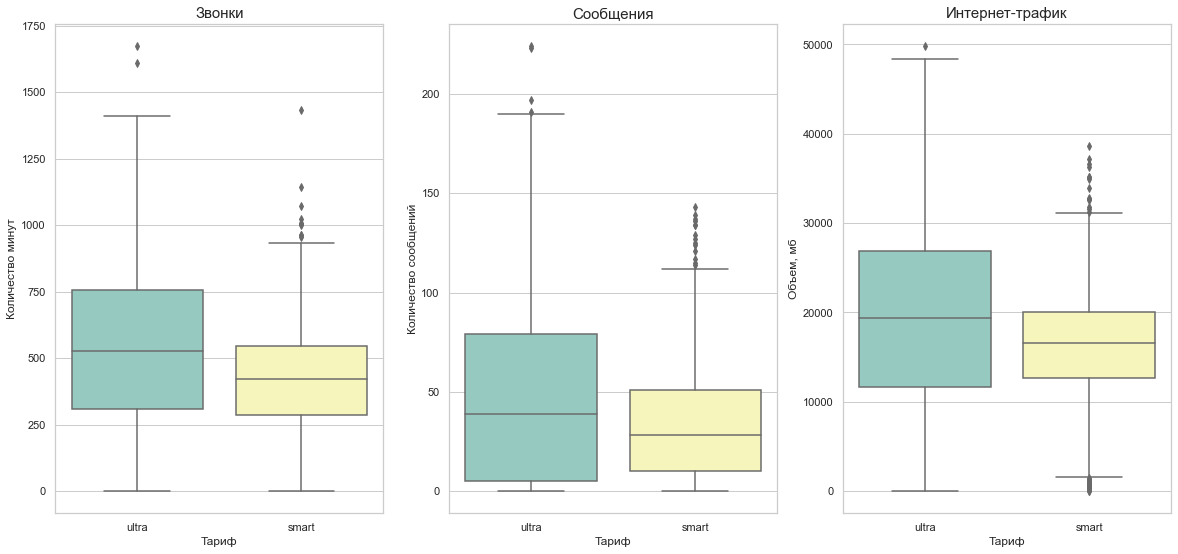

In [1644]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (20, 9))
    plt.subplot(1,3,1)
sns.boxplot(x = 'tariff', y = 'call_sum', data = df, palette = 'Set3')
plt.title('Звонки', fontsize = 15)
plt.ylabel('Количество минут')
plt.xlabel('Тариф')

plt.subplot(1,3,2)
sns.boxplot(x = 'tariff', y = 'mes_count', data = df, palette = 'Set3')
plt.title('Сообщения', fontsize = 15)
plt.ylabel('Количество сообщений')
plt.xlabel('Тариф')

plt.subplot(1,3,3)
sns.boxplot(x = 'tariff', y = 'net_sum', data = df, palette = 'Set3')
plt.title('Интернет-трафик', fontsize = 15)
plt.ylabel('Объем, мб')
plt.xlabel('Тариф')
plt.show()

**Вывод:** Из построенных диаграмм размаха видно, что имеются данные с выбросами по всем группам и тарифам. Больше данных за пределами "усов" имеет тариф `Smart`. Отфильтруем данные от выбросов/

In [1645]:
# по звонкам тарифа ультра
ultra_drop = df.query('tariff == "ultra" & call_sum > 1400')
print('Количество абонентов, у которых звонок длится более 1400 минут:', ultra_drop.call_sum.count())

ultra_call_drop = ultra_drop.index
df.drop(ultra_call_drop, inplace=True)

ultra_new = df.query('tariff == "ultra" & call_sum > 1400')
print('Количество абонентов, у которых звонок длится более 1400 минут:', ultra_new.call_sum.count())

Количество абонентов, у которых звонок длится более 1400 минут: 4
Количество абонентов, у которых звонок длится более 1400 минут: 0


In [1646]:
# по звонкам тарифа смарт
smart_drop = df.query('tariff == "smart" & call_sum > 900')
print('Количество абонентов, у которых звонок длится более 900 минут:', smart_drop.call_sum.count())

smart_call_drop = smart_drop.index
df.drop(smart_call_drop, inplace=True)

smart_new = df.query('tariff == "smart" & call_sum > 900')
print('Количество абонентов, у которых звонок длится более 900 минут:', smart_new.call_sum.count())

Количество абонентов, у которых звонок длится более 900 минут: 16
Количество абонентов, у которых звонок длится более 900 минут: 0


In [1647]:
# по количеству сообщений тарифа ультра
ultra_drop = df.query('tariff == "ultra" & mes_count > 190')
print('Количество абонентов, у которых сообщений более 190 минут:', ultra_drop.mes_count.count())

ultra_mes_drop = ultra_drop.index
df.drop(ultra_mes_drop, inplace=True)

ultra_new = df.query('tariff == "ultra" & mes_count > 190')
print('Количество абонентов, у которых сообщений более 190 минут:', ultra_new.mes_count.count())

Количество абонентов, у которых сообщений более 190 минут: 4
Количество абонентов, у которых сообщений более 190 минут: 0


In [1648]:
#по  количеству сообщений тарифа смарт
smart_drop = df.query('tariff == "smart" & mes_count > 130')
print('Количество абонентов, у которых сообщений более 130 шт.:', smart_drop.mes_count.count())

smart_mes_drop = smart_drop.index
df.drop(smart_mes_drop, inplace=True)

smart_new = df.query('tariff == "smart" & mes_count > 130')
print('Количество абонентов, у которых сообщений более 130 шт.:', smart_new.mes_count.count())

Количество абонентов, у которых сообщений более 130 шт.: 6
Количество абонентов, у которых сообщений более 130 шт.: 0


In [1649]:
# по объему интернет-трафика тарифа ультра
ultra_drop = df.query('tariff == "ultra" & net_sum > 49000')
print('Количество абонентов, у которых объем интернет-трафика более 49000 мб.:', ultra_drop.net_sum.count())

ultra_net_drop = ultra_drop.index
df.drop(ultra_net_drop, inplace=True)

ultra_new = df.query('tariff == "ultra" & net_sum > 49000')
print('Количество абонентов, у которых объем интернет-трафика более 49000 мб.:', ultra_new.net_sum.count())

Количество абонентов, у которых объем интернет-трафика более 49000 мб.: 1
Количество абонентов, у которых объем интернет-трафика более 49000 мб.: 0


In [1650]:
# по объему интернет-трафика тарифа смарт
smart_drop_min = df.query('tariff == "smart" & net_sum < 1000')
print('Количество абонентов, у которых объем интернет-трафика менее 1000 мб.:', smart_drop_min.net_sum.count())

smart_net_drop = smart_drop_min.index
df.drop(smart_net_drop, inplace=True)

smart_new_min = df.query('tariff == "smart" & net_sum < 1000')
print('Количество абонентов, у которых объем интернет-трафика менее 1000 мб.:', smart_new_min.net_sum.count())

smart_drop_max = df.query('tariff == "smart" & net_sum > 31000')
print('Количество абонентов, у которых объем интернет-трафика более 31000 мб.:', smart_drop_max.net_sum.count())

smart_net_drop = smart_drop_max.index
df.drop(smart_net_drop, inplace=True)

smart_new_max = df.query('tariff == "smart" & net_sum > 31000')
print('Количество абонентов, у которых объем интернет-трафика более 31000 мб.:', smart_new_max.net_sum.count())

df

Количество абонентов, у которых объем интернет-трафика менее 1000 мб.: 18
Количество абонентов, у которых объем интернет-трафика менее 1000 мб.: 0
Количество абонентов, у которых объем интернет-трафика более 31000 мб.: 16
Количество абонентов, у которых объем интернет-трафика более 31000 мб.: 0


,user_id,call_sum,call_count,mes_count,net_sum,city,tariff,mes_month,mb_month,min_month,sub_fee,per_mb,per_mes,per_min,total
0,1000,159,22,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
1,1000,172,43,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
2,1000,340,47,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
3,1000,408,52,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
4,1000,466,58,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,247,41,42,20604,Владикавказ,smart,50,15360,500,550,200,3,3,1574.22
3170,1499,70,9,11,1848,Пермь,smart,50,15360,500,550,200,3,3,550.00
3171,1499,449,68,48,17809,Пермь,smart,50,15360,500,550,200,3,3,1028.32
3172,1499,612,74,59,17984,Пермь,smart,50,15360,500,550,200,3,3,1425.50


<a name = "3.2."></a><b>3.2 Построим гистограммы по тарифам длительности звонков, количеству сообщений, объему интернет-трафика и посчитаем среднее, дисперсию и стандартное отклонение</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [1651]:
trf

,mes_month,mb_month,min_month,sub_fee,per_gb,per_mes,per_min,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


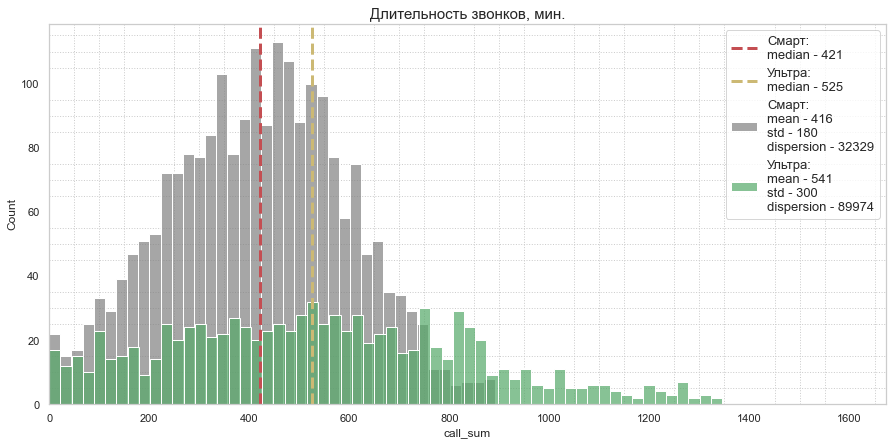

In [1652]:
# отфильтруем таблицу по тарифам
s = df.query('tariff == "smart"')
u = df.query('tariff == "ultra"')

s = s.call_sum
u = u.call_sum

# запишем в переменные среднее, стандартное отклонение и дисперсию
mean_s = s.mean()
std_s = np.std(s)
var_s = np.var(s)

mean_u = u.mean()
std_u = np.std(u)
var_u = np.var(u)

# построим гистограмму
plt.figure(figsize = (15, 7))
ax = sns.histplot(data = s, alpha = .7, bins = 40, color = 'grey')
sns.histplot(data = u, alpha = .7,  ax = ax, color = 'g', bins = 60)
plt.xlim(0, 1673)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.title('Длительность звонков, мин.', fontsize = 15)

# выведем на гистограмме и в легенде медиану по тарифам
plt.axvline(s.describe()['50%'], color = 'r', ls = 'dashed', lw = 3, label = '{:.0f}'.format(s.median()))
plt.axvline(u.describe()['50%'], color = 'y', ls = 'dashed', lw = 3, label = '{:.0f}'.format(u.median()))

line_mediana_smart = 'Смарт:\nmedian - {:.0f}'.format(s.median())
line_mediana_ultra = 'Ультра:\nmedian - {:.0f}'.format(u.median())

# вывод в легенде среднее, стандартное отклонение и дисперсию
smart = 'Смарт:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_s, std_s, var_s)
ultra = 'Ультра:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_u, std_u, var_u)

# вывод легенды
plt.legend([line_mediana_smart, line_mediana_ultra, smart, ultra], prop={'size':13})
plt.show()

**Вывод:** По тарифу `Smart` пользователи в основном разговаривают в диапазоне 280 - 580 минут. Медиана равна 421 минуте разговара. Получается, что абоненты активно пользуются пакетом (500 минут). По тарифу `Ultra` абоненты разговаривают в диапазоне 220 - 700 минут при том, что пакет составляет 3000 минут. Можно сделать вывод, что такой объем минут в пакете излишне. В основном люди разговаривают в райне 525 минут.

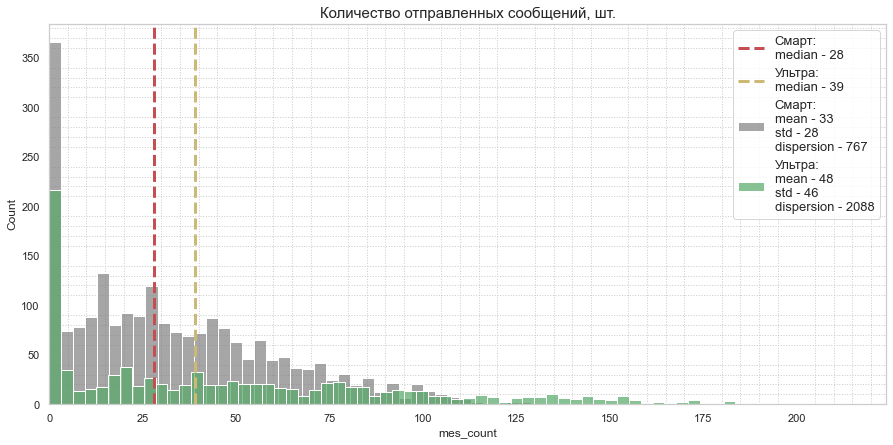

In [1653]:
# отфильтруем таблицу по тарифам
s = df.query('tariff == "smart"')
u = df.query('tariff == "ultra"')

s = s.mes_count
u = u.mes_count

# запишем в переменные среднее, стандартное отклонение и дисперсию
mean_s = s.mean()
std_s = np.std(s)
var_s = np.var(s)

mean_u = u.mean()
std_u = np.std(u)
var_u = np.var(u)

# построим гистограмму
plt.figure(figsize = (15, 7))
ax = sns.histplot(data = s, alpha = .7, bins = 40, color = 'grey')
sns.histplot(data = u, alpha = .7,  ax = ax, color = 'g', bins = 60)
plt.xlim(0, 224)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.title('Количество отправленных сообщений, шт.', fontsize = 15)

# выведем на гистограмме и в легенде медиану по тарифам
plt.axvline(s.describe()['50%'], color = 'r', ls = 'dashed', lw = 3, label = '{:.0f}'.format(s.median()))
plt.axvline(u.describe()['50%'], color = 'y', ls = 'dashed', lw = 3, label = '{:.0f}'.format(u.median()))

line_mediana_smart = 'Смарт:\nmedian - {:.0f}'.format(s.median())
line_mediana_ultra = 'Ультра:\nmedian - {:.0f}'.format(u.median())

# вывод в легенде среднее, стандартное отклонение и дисперсию
smart = 'Смарт:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_s, std_s, var_s)
ultra = 'Ультра:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_u, std_u, var_u)

# вывод легенды
plt.legend([line_mediana_smart, line_mediana_ultra, smart, ultra], prop={'size':13})
plt.show()

**Вывод:** И по тарифу `Smart` и `Ultra` в основном пользователи не используют смс сообщения. Но можно сказать, что абоненты тарифа `Smart` используют смс активнее и отправляют в месяц 33 сообщения, а по тарифу `Ultra` - 48 сообщений, но активность менее проявлена. И количество в 1000 сообщений в тарифе слишком большое.

In [1654]:
# переведем столбец net_sum в гигабайты для удобства отображения на графикек
df['net_sum'] = round(((df['net_sum']) / 1024), 2)
df

,user_id,call_sum,call_count,mes_count,net_sum,city,tariff,mes_month,mb_month,min_month,sub_fee,per_mb,per_mes,per_min,total
0,1000,159,22,22,2.20,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
1,1000,172,43,60,22.71,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
2,1000,340,47,75,13.69,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
3,1000,408,52,81,13.74,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
4,1000,466,58,57,14.24,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,247,41,42,20.12,Владикавказ,smart,50,15360,500,550,200,3,3,1574.22
3170,1499,70,9,11,1.80,Пермь,smart,50,15360,500,550,200,3,3,550.00
3171,1499,449,68,48,17.39,Пермь,smart,50,15360,500,550,200,3,3,1028.32
3172,1499,612,74,59,17.56,Пермь,smart,50,15360,500,550,200,3,3,1425.50


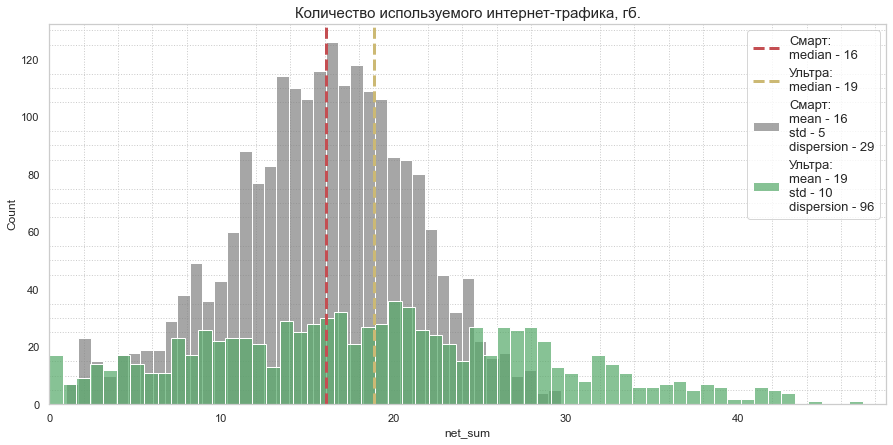

In [1655]:

# отфильтруем таблицу по тарифам
s = df.query('tariff == "smart"')
u = df.query('tariff == "ultra"')

s = s.net_sum
u = u.net_sum

# запишем в переменные среднее, стандартное отклонение и дисперсию
mean_s = s.mean()
std_s = np.std(s)
var_s = np.var(s)

mean_u = u.mean()
std_u = np.std(u)
var_u = np.var(u)

# построим гистограмму
plt.figure(figsize = (15, 7))
ax = sns.histplot(data = s, alpha = .7, bins = 40, color = 'grey')
sns.histplot(data = u, alpha = .7,  ax = ax, color = 'g', bins = 60)
plt.xlim(0, 48.62)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.title('Количество используемого интернет-трафика, гб.', fontsize = 15)

# выведем на гистограмме и в легенде медиану по тарифам
plt.axvline(s.describe()['50%'], color = 'r', ls = 'dashed', lw = 3, label = '{:.0f}'.format(s.median()))
plt.axvline(u.describe()['50%'], color = 'y', ls = 'dashed', lw = 3, label = '{:.0f}'.format(u.median()))

line_mediana_smart = 'Смарт:\nmedian - {:.0f}'.format(s.median())
line_mediana_ultra = 'Ультра:\nmedian - {:.0f}'.format(u.median())

# вывод в легенде среднее, стандартное отклонение и дисперсию
smart = 'Смарт:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_s, std_s, var_s)
ultra = 'Ультра:\nmean - {:.0f}\nstd - {:.0f}\ndispersion - {:.0f}'.format(mean_u, std_u, var_u)

# вывод легенды
plt.legend([line_mediana_smart, line_mediana_ultra, smart, ultra], prop={'size':13})
plt.show()

**Выводы:** По тарифу `Smart` люди пользуются интернет-трафиком в диапазоне 12 - 23 гб., а по тарифу включено 15 гб. и наблюдается большая активность. Абонентам часто приходится доплачивать за дополнительный объем интренет-трафика. По тарифу `Ultra` пользователи используют от 8 до 29 гб. и в целом людям хватает пакета в 30 гб.

<a name = "4."></a><font size = "4"><b>4. Проверка гипотез</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "4.1."></a><b>4.1 Средняя выручка пользователей тарифов «Ultra» и «Smart» различаются</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>
<br/>
Нулевая гипотеза это когда средняя выручка пользователей тарифов «Ultra» и «Smart» будет равна, а альтернативная гипотеза - средняя выручка пользователей тарифов «Ultra» и «Smart» будет различаться.<br/>
<br/>
Будем сравнивать средние двух генеральных совокупностей между собой.

In [1656]:
# посмотрим равны ли у нас выборки
print('Количество пользователей тарифа Ultra:', df.query('tariff == "ultra"')['tariff'].count())
print('Количество пользователей тарифа Smart:', df.query('tariff == "smart"')['tariff'].count())

Количество пользователей тарифа Ultra: 942
Количество пользователей тарифа Smart: 2167


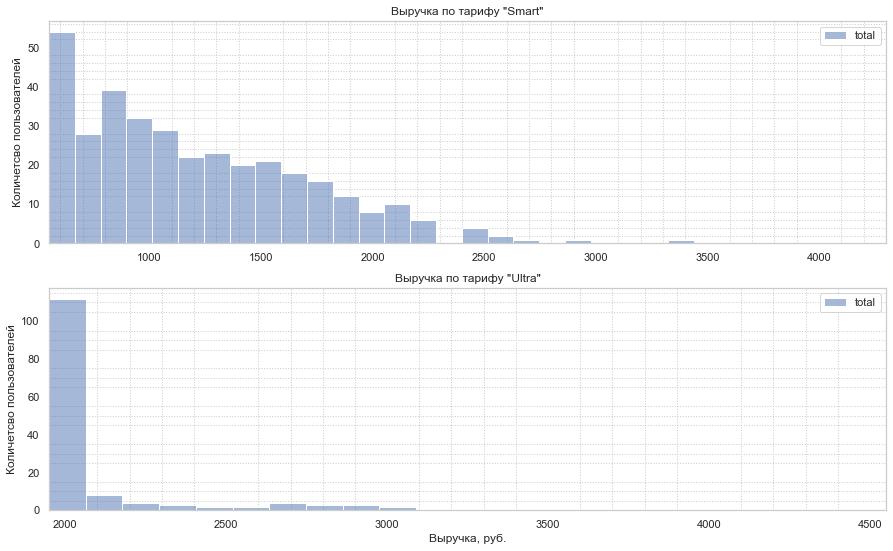

count    2167.000000
mean     1196.331735
std       707.033645
min       550.000000
25%       550.000000
50%       955.270000
75%      1629.145000
max      4288.970000
Name: total, dtype: float64
count     942.000000
mean     2056.411295
std       345.006373
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4539.110000
Name: total, dtype: float64


In [1657]:
dfs = df.query('tariff == "smart"')
dfu = df.query('tariff == "ultra"')

mean_s_all = dfs.pivot_table(index = ['tariff', 'user_id'], values = 'total', aggfunc = 'mean')
mean_u_all = dfu.pivot_table(index = ['tariff', 'user_id'], values = 'total', aggfunc = 'mean')

plt.figure(figsize = (15, 9))
plt.subplot(211)
sns.histplot(data = mean_s_all, bins = 25)
plt.xlim(550, 4300)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количетсво пользователей')
plt.title('Выручка по тарифу "Smart"')

plt.subplot(212)
sns.histplot(data = mean_u_all, bins = 10)
plt.xlim(1950, 4550)
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.xlabel('Выручка, руб.')
plt.ylabel('Количетсво пользователей')
plt.title('Выручка по тарифу "Ultra"')
plt.show()
print(dfs.total.describe())
print(dfu.total.describe())

In [1658]:
# посмотрим среднее, дисперсию и стандартное отклонение по тарифам «Ultra» и «Smart»
mean_u = df.query('tariff == "ultra"')['total'].mean()
var_u = np.var(df.query('tariff == "ultra"')['total'])
std_u = np.std(df.query('tariff == "ultra"')['total'])
print('По тарифу «Ultra»:\nСреднее - {:.0f}\nДисперсия - {:.0f}\nСтандартное отклонение - {:.0f}'.format(mean_u, var_u, std_u))
print()
mean_s = df.query('tariff == "smart"')['total'].mean()
var_s = np.var(df.query('tariff == "smart"')['total'])
std_s = np.std(df.query('tariff == "smart"')['total'])
print('По тарифу «Smart»:\nСреднее - {:.0f}\nДисперсия - {:.0f}\nСтандартное отклонение - {:.0f}'.format(mean_s, var_s, std_s))
print()
print('Примечание: считаю, что выборки небольшие и поэтому можно сравнить средние и сделать вывод, но мы проведем t-тест')

По тарифу «Ultra»:
Среднее - 2056
Дисперсия - 118903
Стандартное отклонение - 345

По тарифу «Smart»:
Среднее - 1196
Дисперсия - 499666
Стандартное отклонение - 707

Примечание: считаю, что выборки небольшие и поэтому можно сравнить средние и сделать вывод, но мы проведем t-тест


In [1659]:
alpha = .05

results = st.ttest_ind(
    df.query('tariff == "smart"')['total'],
    df.query('tariff == "ultra"')['total']
)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 1.9154073555002877e-232
Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу: "Средняя выручка пользователей тарифов «Ultra» и «Smart» будет равна". Такой вывод можно было сделать сравнив средние двух тарифов.<br/>
По тарифам можно скачать, что `Ultra` имеет большее среднее 2056 руб., также основная часть пользователей в полне обходиться стандартным пакетом. По тарифу `Smart` тоже преобладают пользователи, которые довольствуются месячным пакетом, но присутствует довольно большая часть абонентов, которые перерасходуют стандартный пакет в 550 руб.

<a name = "4.2."></a><b>4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</b><br/>
<font size = "2">[содержание](#0.0)</font><br/>
<br/>
Нулевая гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".<br/>
Альтернативная гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

In [1660]:
# отфильтруем пользователей из Москвы и остальным городам
dfc = df.query('city == "Москва"')
dfv = df.query('city != "Москва"')

In [1661]:
# посмотрим среднее, дисперсию и стандартное отклонение по пользователям из Москвы и остальным городам
mean_m = dfc.total.mean()
var_m = np.var(dfc.total)
std_m = np.std(dfc.total)
print('По Москве:\nСреднее - {:.0f}\nДисперсия - {:.0f}\nСтандартное отклонение - {:.0f}'.format(mean_m, var_m, std_m))
print()
mean_v = dfv.total.mean()
var_v = np.var(dfv.total)
std_v = np.std(dfv.total)
print('В остальных городах:\nСреднее - {:.0f}\nДисперсия - {:.0f}\nСтандартное отклонение - {:.0f}'.format(mean_v, var_v, std_v))

По Москве:
Среднее - 1495
Дисперсия - 512245
Стандартное отклонение - 716

В остальных городах:
Среднее - 1448
Дисперсия - 546923
Стандартное отклонение - 740


In [1662]:
# создадим столбец с категоризацией городов
def x(row):
    if row.city == 'Москва':
        return 'Москва'
    if row.city != 'Москва':
        return 'Другие города'
    
df['group_city'] = df.apply(x, axis = 1)

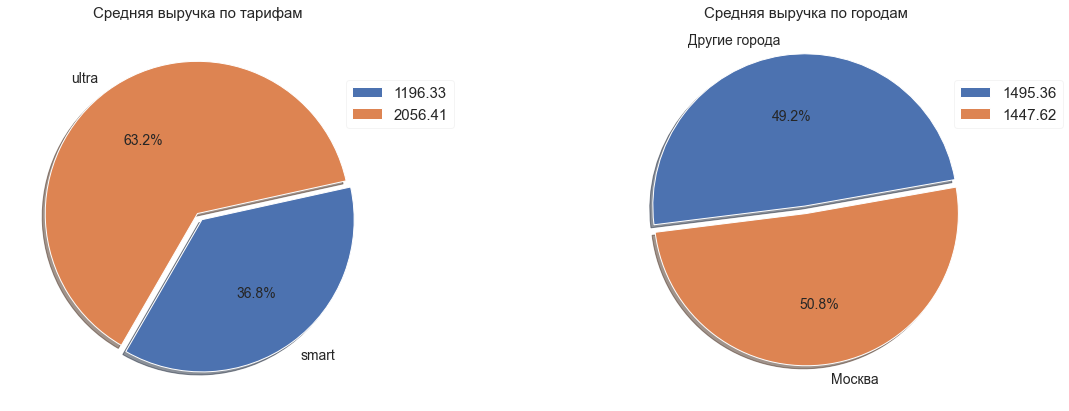

In [1663]:
# построим круговые диаграммы на которых отразим выручку по тарифам и по пользователям Москвы и других городов
plt.figure(figsize = (20, 7))
plt.subplot(121)
explode = (0.05, 0)
axes = df.groupby('tariff')['total'].mean().plot(
    kind = 'pie',
    fontsize = 14,
    shadow = True,
    autopct = '%1.1f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 240,
    subplots = True
)
plt.title('Средняя выручка по тарифам', fontsize = 15)

smart_mean = round(df.query('tariff == "smart"')['total'].mean(), 2)
ultra_mean = round(df.query('tariff == "ultra"')['total'].mean(), 2)

for ax in axes:
    ax.legend([smart_mean, ultra_mean], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':15})
    ax.set_ylabel('')


plt.subplot(122)
explode = (0.05, 0)
axes = df.groupby('group_city')['total'].mean().plot(
    kind = 'pie',
    fontsize = 14,
    shadow = True,
    autopct = '%1.1f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 10,
    subplots = True
)
plt.title('Средняя выручка по городам', fontsize = 15)

moscow_mean = round(df.query('group_city == "Москва"')['total'].mean(), 2)
other_mean = round(df.query('group_city != "Москва"')['total'].mean(), 2)

for ax in axes:
    ax.legend([moscow_mean, other_mean], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':15})
    ax.set_ylabel('')
plt.show()

In [1664]:
alpha = .05

results = st.ttest_ind(
    df.query('group_city == "Москва"')['total'],
    df.query('group_city != "Москва"')['total']
)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 0.1515838709277401
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Отвергнуть нулевую гипотезу: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов" не вышло. `pvalue` имеет значение 15% с такой вероятностью может отличаться выручка Москвы и других городов.

<a name = "5."></a><font size = "4"><b>5. Общий вывод</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

По условию была поставлена задача определить какой тариф приносит больше денег и дать ответ какой тариф лучше.

У нас два тарифа <font color = 'blue'><b>Smart</b></font> за `550` руб. и <font color = 'orange'><b>Ultra</b></font> за `1950` руб. компании <font color = 'blue'><b>Мега</b></font><font color = 'orange'><b>лайн</b></font>.<br/>
<b>Проведена работа по обработке данных:</b><br/>
- изменение типа данных.
- согласно условию заменили отфильтрованные данные в столбцах duration и mb_used (<font color = 'blue'><b>Мега</b></font><font color = 'orange'><b>лайн</b></font> всегда округляет секунды до минут, а мегабайты — до гигабайт.)
- посчитали:
    * количество сделанных звонков и израсходованных минут разговора по месяцам.
    * количество отправленных сообщений по месяцам.
    * объем израсходованного интернет-трафика по месяцам.
    * помесячную выручку с каждого пользователя.
- объединили всё в одну таблицу.

<b>Провели анализ данных по длительности звонков, количеству сообщений и объему интернет-трафика:</b><br/>
- построили диаграмму размаха и отбросили отбивающиеся значения.
- построили гистограммы по данным категориям и посчитали среднее, стандартное отклонение и дисперсию.

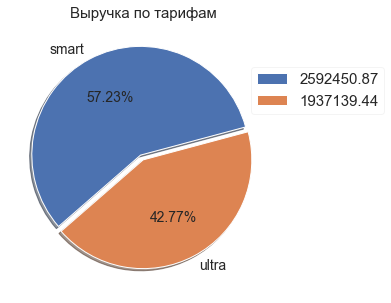

In [1665]:
# посмотрим выручку по двум тарифам
plt.figure(figsize = (12, 5))
plt.subplot(121)
explode = (0.05, 0)
axes = df.groupby('tariff')['total'].sum().plot(
    kind = 'pie',
    fontsize = 14,
    shadow = True,
    autopct = '%1.2f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 15,
    subplots = True
)
plt.title('Выручка по тарифам', fontsize = 15)

smart_mean = round(df.query('tariff == "smart"')['total'].sum(), 2)
ultra_mean = round(df.query('tariff == "ultra"')['total'].sum(), 2)

for ax in axes:
    ax.legend([smart_mean, ultra_mean], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':15})
    ax.set_ylabel('')

**Подытожим:**<br/>
- по тарифу <font color = 'blue'><b>Smart</b></font> пользователи разговаривают в диапазоне 280 - 580 минут. В основном люди разговаривают 421 минуту и получается, что абоненты активно пользуются пакетом (500 минут). Но также наблюдается перерасходстандартного пакета минут от 580 до 780.
- по тарифу <font color = 'orange'><b>Ultra</b></font> абоненты разговаривают в диапазоне 220 - 700 минут при том, что пакет составляет 3000 минут. График хорошо отображает основную часть людей, которая укладывается в 900 минут разговора, а в основном люди разговаривают в райне 525 минут. Можно сделать вывод, что такой объем минут в пакете излишне.
- можно утверждать, что большая часть пользователей тарифов <font color = 'blue'><b>Smart</b></font> и <font color = 'orange'><b>Ultra</b></font> не используют смс сообщения. Но можно сказать, что тариф <font color = 'blue'><b>Smart</b></font> используют смс активнее и отправляют в месяц 33 сообщения, а по тарифу <font color = 'orange'><b>Ultra</b></font> - 48 сообщений, но активность проявлена меньше. И количество в 1000 сообщений в тарифе тоже излишне.
- по тарифу <font color = 'blue'><b>Smart</b></font> люди пользуются интернет-трафиком в диапазоне `12 - 23` гб., а пакет составляет `15` гб. и наблюдается большая активность. Абонентам часто приходится доплачивать за дополнительный объем интренет-трафика. По тарифу <font color = 'orange'><b>Ultra</b></font> пользователи используют `8 - 29` гб. и в целом людям хватает пакета в `30` гб.
- отвечая на первый вопрос отметим, что выручка по тарифу <font color = 'blue'><b>Smart</b></font> составляет 2.59 млн. руб - 57,23%, а выручка по тарифу <font color = 'orange'><b>Ultra</b></font> составляет 1.93 млн. руб. - 42,77%. Делаем вывод, что выгоднее тариф <font color = 'blue'><b>Smart</b></font>, но есть замечание:
- по выгрузке количество пользователей, тарифа <font color = 'blue'><b>Smart</b></font> в 2 раза больше <font color = 'orange'><b>Ultra</b></font> - 2167 чел.

<b>Провели проверку гипотез:</b><br/>
- средняя выручка пользователей тарифов <font color = 'blue'><b>Smart</b></font> и <font color = 'orange'><b>Ultra</b></font> различаются:
    * Нулевая гипотеза: "Средняя выручка пользователей тарифов <font color = 'blue'><b>Smart</b></font> и <font color = 'orange'><b>Ultra</b></font> будет равна".
    * Альтернативная гипотеза: "Средняя выручка пользователей тарифов <font color = 'blue'><b>Smart</b></font> и <font color = 'orange'><b>Ultra</b></font> будет различаться".
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:
    * Нулевая гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".
    * Альтернативная гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для проверки гипотез сравнивали средние двух генеральных совокупностей между собой.<br/>
- по тарифу <font color = 'blue'><b>Smart</b></font>:
    * Среднее - 1196
    * Дисперсия - 499666
    * Стандартное отклонение - 707<br/>
<br/>
- по тарифу <font color = 'orange'><b>Ultra</b></font>:
    * среднее - 2056
    * дисперсия - 118903
    * стандартное отклонение - 345 <br/>
<br/>
<b>Вывод:</b> `p - значение` 1.9154073555002877e-232 отвергаем нулевую гипотезу: "Средняя выручка пользователей тарифов <font color = 'blue'><b>Smart</b></font> и <font color = 'orange'><b>Ultra</b></font> будет равна". Такой вывод можно было сделать сравнив средние двух тарифов.<br/>


- по Москве:
    * среднее - 1495
    * дисперсия - 512245
    * стандартное отклонение - 716 <br/>
<br/>
- в остальных городах:
    * среднее - 1448
    * дисперсия - 546923
    * стандартное отклонение - 740 <br/>
<br/>
<b>Вывод:</b> Отвергнуть нулевую гипотезу: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов" не вышло. pvalue имеет значение 15% с такой вероятностью может отличаться выручка Москвы и других городов. По круговой диаграмме видно, что средняя выручка по городам практически равна. У нас большая страна, но сеть связи хорошо развита и доступна многим.

Отвечая на второй вопрос выделить конкретно какой-то тариф довольно сложно, т.к. есть недостатки и у <font color = 'blue'><b>Smart</b></font> и у <font color = 'orange'><b>Ultra</b></font>, и очень слабая выборка, чтобы давать решительный ответ.
Но можно предложить рассмотреть вариант для создания третьего тарифа с учетом недостатков настоящих, либо сделать более детальный анализ с большими выборками по тарифам и внести корректировки.